In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load medical dataset
medical = pd.read_csv('medical_market_basket.csv')

In [2]:
# Check the first few rows of the dataset to spot any issues
medical.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Example of a Transaction
medical.iloc[9]

Presc01         abilify
Presc02    atorvastatin
Presc03      folic acid
Presc04        naproxen
Presc05        losartan
Presc06             NaN
Presc07             NaN
Presc08             NaN
Presc09             NaN
Presc10             NaN
Presc11             NaN
Presc12             NaN
Presc13             NaN
Presc14             NaN
Presc15             NaN
Presc16             NaN
Presc17             NaN
Presc18             NaN
Presc19             NaN
Presc20             NaN
Name: 9, dtype: object

In [4]:
# Get a count of the NaN
print("\nMissing values per column:")
print(medical.isna().sum())


Missing values per column:
Presc01     7501
Presc02     9255
Presc03    10613
Presc04    11657
Presc05    12473
Presc06    13138
Presc07    13633
Presc08    14021
Presc09    14348
Presc10    14607
Presc11    14746
Presc12    14848
Presc13    14915
Presc14    14955
Presc15    14977
Presc16    14994
Presc17    14998
Presc18    14998
Presc19    14999
Presc20    15001
dtype: int64


In [5]:
# Remove blank lines where 'Presc01' is NaN
medical = medical[medical['Presc01'].notna()]

# Reset the index to ensure we don’t skip every other row
medical.reset_index(drop=True, inplace=True)
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [6]:
# Check the first few rows of the cleaned dataset
print("First few rows of the medical dataset after cleaning:")
print(medical.head())
print(medical.info())

First few rows of the medical dataset after cleaning:
      Presc01            Presc02                    Presc03       Presc04  \
0  amlodipine  albuterol aerosol                allopurinol  pantoprazole   
1  citalopram            benicar  amphetamine salt combo xr           NaN   
2   enalapril                NaN                        NaN           NaN   
3  paroxetine        allopurinol                        NaN           NaN   
4     abilify       atorvastatin                 folic acid      naproxen   

     Presc05     Presc06     Presc07      Presc08     Presc09      Presc10  \
0  lorazepam  omeprazole  mometasone  fluconozole  gabapentin  pravastatin   
1        NaN         NaN         NaN          NaN         NaN          NaN   
2        NaN         NaN         NaN          NaN         NaN          NaN   
3        NaN         NaN         NaN          NaN         NaN          NaN   
4   losartan         NaN         NaN          NaN         NaN          NaN   

  Presc11   Pr

In [7]:
# Create the list of lists
large_list = []

# Iterate through each row in the DataFrame
for row_number in range(len(medical)):
    # Generate a temporary tiny list for each row
    tiny_list = []
    
    # Iterate through each prescription (column) in the row
    for cell in range(len(medical.columns)):
        # Check if the cell is not null/NaN, and if true, add to the temporary tiny list
        if pd.notnull(medical.iloc[row_number, cell]):
            tiny_list.append(str(medical.iloc[row_number, cell]))
    
    # Append the filled tiny list to the large list
    if tiny_list:  # Only append if there is data in the row
        large_list.append(tiny_list)

# Check the output of the list of lists
print(f"Sample of list of lists:\nRow 0: {large_list[0]}\nRow 1: {large_list[-1]}\n...")

Sample of list of lists:
Row 0: ['amlodipine', 'albuterol aerosol', 'allopurinol', 'pantoprazole', 'lorazepam', 'omeprazole', 'mometasone', 'fluconozole', 'gabapentin', 'pravastatin', 'cialis', 'losartan', 'metoprolol succinate XL', 'sulfamethoxazole', 'abilify', 'spironolactone', 'albuterol HFA', 'levofloxacin', 'promethazine', 'glipizide']
Row 1: ['amphetamine salt combo xr', 'levofloxacin', 'diclofenac sodium', 'cialis']
...


In [8]:
# Initialize the TransactionEncoder
encoder = TransactionEncoder()

In [9]:
# Fit and transform the data
temp_encoded = encoder.fit(large_list).transform(large_list)

In [10]:
# Create a new DataFrame with the encoded data
encoded_medical = pd.DataFrame(temp_encoded, columns=encoder.columns_)

In [11]:
# Check the cleaned Data
encoded_medical

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Save cleaned dataset
encoded_medical.to_csv('cleaned_encoded_prescriptions.csv', index=False)

In [13]:
# Apply apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(encoded_medical, min_support=0.005, use_colnames=True)

# View the resulting frequent itemsets
print("\nFrequent itemsets:")
frequent_itemsets


Frequent itemsets:


,support,itemsets
0,0.011998,(Duloxetine)
1,0.046794,(Premarin)
2,0.238368,(abilify)
3,0.015731,(acetaminophen)
4,0.011998,(actonel)
...,...,...
720,0.005466,"(citalopram, losartan, glyburide)"
721,0.005466,"(doxycycline hyclate, diazepam, glyburide)"
722,0.005199,"(diazepam, losartan, glyburide)"
723,0.005599,"(metoprolol, diazepam, glyburide)"


In [14]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric= 'lift', min_threshold=1)

# Check the resulting association rules
print("\nAssociation rules:")
print(rules)


Association rules:
                   antecedents               consequents  antecedent support  \
0                    (abilify)              (Duloxetine)            0.238368   
1                 (Duloxetine)                 (abilify)            0.011998   
2                   (Premarin)                (diazepam)            0.046794   
3                   (diazepam)                (Premarin)            0.163845   
4        (doxycycline hyclate)                (Premarin)            0.095054   
...                        ...                       ...                 ...   
1827  (metoprolol, lisinopril)                (diazepam)            0.016931   
1828    (diazepam, lisinopril)              (metoprolol)            0.023064   
1829              (metoprolol)    (diazepam, lisinopril)            0.095321   
1830                (diazepam)  (metoprolol, lisinopril)            0.163845   
1831              (lisinopril)    (metoprolol, diazepam)            0.098254   

      consequent su

In [15]:
# Sort the rules based on support, lift, and confidence
rules_sorted = rules.sort_values(by=['support', 'lift', 'confidence'], ascending=[False, False, False])

# Print the top 3 rules
top_3_rules = rules_sorted[['antecedents', 'consequents', 'support', 'lift', 'confidence']].head(3)
print("Top 3 association rules sorted by support, lift, and confidence:")
print(top_3_rules)

Top 3 association rules sorted by support, lift, and confidence:
     antecedents   consequents   support      lift  confidence
27  (carvedilol)     (abilify)  0.059725  1.439085    0.343032
26     (abilify)  (carvedilol)  0.059725  1.439085    0.250559
43    (diazepam)     (abilify)  0.052660  1.348332    0.321400


In [16]:
# Get the value counts for antecedents and consequents
print("\nAntecedents value counts:")
print(rules.antecedents.value_counts())

print("\nConsequents value counts:")
print(rules.consequents.value_counts())


Antecedents value counts:
antecedents
(abilify)                           142
(carvedilol)                        118
(diazepam)                           91
(atorvastatin)                       79
(amphetamine salt combo xr)          73
                                   ... 
(carvedilol, fenofibrate)             1
(carvedilol, metformin)               1
(naproxen, carvedilol)                1
(abilify, spironolactone)             1
(doxycycline hyclate, glipizide)      1
Name: count, Length: 188, dtype: int64

Consequents value counts:
consequents
(abilify)                           142
(carvedilol)                        118
(diazepam)                           91
(atorvastatin)                       79
(amphetamine salt combo xr)          73
                                   ... 
(carvedilol, fenofibrate)             1
(carvedilol, metformin)               1
(naproxen, carvedilol)                1
(spironolactone, carvedilol)          1
(doxycycline hyclate, glipizide)      1
Nam

In [17]:
# Review rules specifically related to Abilify
abilify_related_rules = rules[rules['antecedents'].apply(lambda x: 'abilify' in x) | rules['consequents'].apply(lambda x: 'abilify' in x)]

In [18]:
# Print Abilify-related rules
print("\nAbilify-related rules:")
print(abilify_related_rules)


Abilify-related rules:
                  antecedents              consequents  antecedent support  \
0                   (abilify)             (Duloxetine)            0.238368   
1                (Duloxetine)                (abilify)            0.011998   
10        (albuterol aerosol)                (abilify)            0.020397   
11                  (abilify)      (albuterol aerosol)            0.238368   
12                  (abilify)            (allopurinol)            0.238368   
...                       ...                      ...                 ...   
1361     (abilify, metformin)             (metoprolol)            0.023064   
1362  (metoprolol, metformin)                (abilify)            0.007999   
1363                (abilify)  (metoprolol, metformin)            0.238368   
1364             (metoprolol)     (abilify, metformin)            0.095321   
1365              (metformin)    (abilify, metoprolol)            0.050527   

      consequent support   support  con

In [19]:
# Filtered association rules for higher lift and confidence
filtered_rules = rules[(rules['lift'] > 2.33)]
print("\nFiltered association rules (lift > 2.33):")
print(filtered_rules)


Filtered association rules (lift > 2.33):
                 antecedents               consequents  antecedent support  \
108             (alprazolam)           (acetaminophen)            0.079323   
109          (acetaminophen)              (alprazolam)            0.015731   
110             (amlodipine)           (acetaminophen)            0.071457   
111          (acetaminophen)              (amlodipine)            0.015731   
118      (albuterol aerosol)              (citalopram)            0.020397   
...                      ...                       ...                 ...   
1801            (lisinopril)  (carvedilol, metoprolol)            0.098254   
1826  (metoprolol, diazepam)              (lisinopril)            0.022930   
1828  (diazepam, lisinopril)              (metoprolol)            0.023064   
1829            (metoprolol)    (diazepam, lisinopril)            0.095321   
1831            (lisinopril)    (metoprolol, diazepam)            0.098254   

      consequent sup

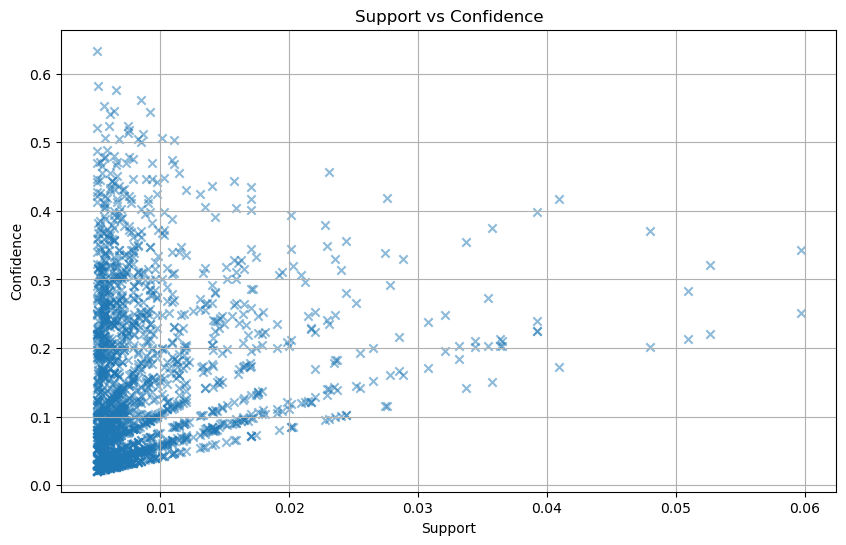

In [20]:
# Plotting the support vs confidence of the association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker='x')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()